In [1]:
pip install Quandl

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import quandl
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [4]:
df = quandl.get('WIKI/GOOGL')

In [5]:
print(df)

               Open     High      Low     Close      Volume  Ex-Dividend  \
Date                                                                       
2004-08-19   100.01   104.06    95.96   100.335  44659000.0          0.0   
2004-08-20   101.01   109.08   100.50   108.310  22834300.0          0.0   
2004-08-23   110.76   113.48   109.05   109.400  18256100.0          0.0   
2004-08-24   111.24   111.60   103.57   104.870  15247300.0          0.0   
2004-08-25   104.76   108.00   103.88   106.000   9188600.0          0.0   
...             ...      ...      ...       ...         ...          ...   
2018-03-21  1092.57  1108.70  1087.21  1094.000   1990515.0          0.0   
2018-03-22  1080.01  1083.92  1049.64  1053.150   3418154.0          0.0   
2018-03-23  1051.37  1066.78  1024.87  1026.550   2413517.0          0.0   
2018-03-26  1050.60  1059.27  1010.58  1054.090   3272409.0          0.0   
2018-03-27  1063.90  1064.54   997.62  1006.940   2940957.0          0.0   

           

In [6]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


In [8]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


In [9]:
df=df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [10]:
#high and low percentage 
df['HL_PCT']=(df['Adj. High']-df['Adj. Close']) /df['Adj. Close'] * 100.0
#percentage change
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100.0

In [11]:
#features in the data
df=df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [12]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [13]:
forecast_col = 'Adj. Close'

In [14]:
#treated as outlier instead of deleting the whole data
df.fillna(-9999,inplace=True)

In [15]:
import math

In [16]:
forecast_out=int(math.ceil(0.01*len(df)))

In [17]:
df['label']=df[forecast_col].shift(-forecast_out)

In [18]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [19]:
x=np.array(df.drop(['label'],1))
y=np.array(df['label'])

In [20]:
x=preprocessing.scale(x)

In [21]:
x=x[:-forecast_out+1]

In [22]:
#y=np.array(df['label'])
y = y[:-forecast_out+1]

In [23]:
print(len(x),len(y))

3390 3390


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [26]:
pd.isnull(x).sum()
pd.isnull(y).sum()

1

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [28]:
print("Number of missing values in x_train:", np.isnan(x_train).sum())
print("Number of missing values in y_train:", np.isnan(y_train).sum())


Number of missing values in x_train: 0
Number of missing values in y_train: 1


In [29]:
imp=SimpleImputer(strategy='mean')

In [30]:
y_train_imp = imp.fit_transform(y_train.reshape(-1, 1))

In [31]:
x_train_imp=imp.fit_transform(x_train)


In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train_imp,y_train_imp)

LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error,r2_score


In [35]:
y_pred=lr.predict(x_test)

In [36]:
print(y_pred)

[[ 371.52034496]
 [ 407.63770833]
 [ 241.70752114]
 [1028.86107445]
 [  97.05651378]
 [ 606.69305716]
 [1206.44874829]
 [ 309.08459813]
 [ 822.4969619 ]
 [ 149.69255514]
 [ 229.5656157 ]
 [ 329.88967145]
 [ 527.71241467]
 [ 968.17392172]
 [ 297.39775563]
 [  98.54073421]
 [ 352.12040837]
 [ 142.77858765]
 [ 831.32193391]
 [ 790.67848923]
 [ 279.7883913 ]
 [ 296.00737808]
 [ 197.51741925]
 [ 323.43930565]
 [ 318.36388203]
 [ 580.55250335]
 [ 282.07228431]
 [ 419.36200165]
 [ 403.5296137 ]
 [ 269.15627282]
 [ 286.66895999]
 [ 794.51276998]
 [ 201.73206542]
 [ 450.82999359]
 [ 223.26498796]
 [ 166.20791953]
 [ 326.18637505]
 [ 280.15499238]
 [ 793.44301113]
 [ 665.81986979]
 [  99.01955066]
 [ 258.03257814]
 [ 274.04750502]
 [ 588.41431272]
 [ 816.41249786]
 [ 447.39179294]
 [ 416.55204084]
 [ 278.78854363]
 [ 152.54878561]
 [ 941.69574207]
 [ 237.28345556]
 [ 267.75849186]
 [ 255.63954029]
 [ 302.73310295]
 [ 226.08226355]
 [ 405.20836506]
 [ 364.19959763]
 [ 781.02996524]
 [ 247.3454553

In [37]:
mse=mean_squared_error(y_test,y_pred)

In [38]:
print(mse)

1349.7211151432195


In [39]:
rsq=r2_score(y_test,y_pred)

In [40]:
print(rsq)

0.9771788049879787


In [41]:
import matplotlib.pyplot as plt
from matplotlib import style

In [42]:
style.use('ggplot')

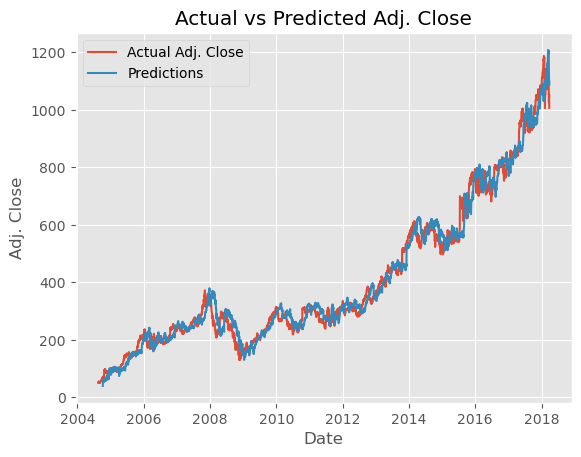

In [43]:
dates_actual = df.index  # Dates from the index of your DataFrame
adj_close_actual = df['Adj. Close']  # Actual 'Adj. Close' values from your DataFrame
predictions = lr.predict(x)  # Predictions from your linear regression model

# Plot actual 'Adj. Close'
plt.plot(dates_actual, adj_close_actual, label='Actual Adj. Close')

# Plot predictions
plt.plot(dates_actual[-len(predictions):], predictions, label='Predictions')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Adj. Close')
plt.title('Actual vs Predicted Adj. Close')
plt.legend()

In [44]:
#Saving the model 
import pickle

In [45]:
with open('linearregression.pickle','wb') as f:
    pickle.dump(lr,f)

In [46]:
pic = open('linearregression.pickle','rb')
model=pickle.load(pic)